# Pytorch Computer Vision


## 0.computer vision libaries in Pytorch
* [`torchvision`](https://pytorch.org/vision/stable/index.html) - base domain library for Pytorch CV.
* [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) - get datasets and data loading functions for computer vision here.
* [`torchvision.models`](https://pytorch.org/vision/stable/models.html) -get pretrained computer vision models that can leverage for your own problems.
* [`torchvision.transforms`](https://pytorch.org/vision/stable/transforms.html#transforming-and-augmenting-images) - functions for manuplating your vision data (images) to  be suitable for use with a ML Model.
* [`torch.utils.data.Dataset`](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#datasets-dataloaders) - base dataset class for pytorch
* [`torch.utils.data.DataLoader`](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#datasets-dataloaders) - creates a python iterable over a dataset.   

In [ ]:
# Import Pytorch
import torch
from torch import nn

# Import Torch vision
import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

# Import Matplotlib for Visualization
import matplotlib.pyplot as plt

#Check  version
print(torch.__version__)
print(torchvision.__version__)

1.13.1+cu116
0.14.1+cu116


## 1.Getting a dataset
The dataset we'll use Fashion MNIST
from `torch.vision.dataset`:
https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html

In [ ]:
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", #where to download data to ?
    train = True, # do we want training dataset
    download= True, #yes or no
    transform= ToTensor(), # How do we want tranform data
    target_transform = None # How do we want to transform the labels/targets?

)
test_data = datasets.FashionMNIST(
    root = "data", #where to download data to ?
    train = False, # do we want training dataset?
    download= True, #yes or no
    transform= ToTensor(), # How do we want tranform data
    target_transform = None # How do we want to transform the labels/targets?

)

In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
# See the first training example
image ,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
classtoidx = train_data.class_to_idx
classtoidx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
image.shape , label
# check the shape our image
print(f"Image shape: {image.shape} -> [color_channels,height,width]")
print(f"Image Label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels,height,width]
Image Label: Ankle boot


### 1.2 Visulaizing our data

Image shape: torch.Size([1, 28, 28])


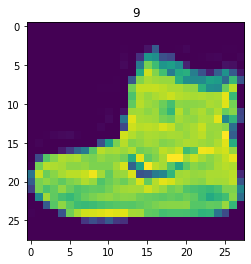

In [ ]:
import matplotlib.pyplot  as plt
image , label =train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

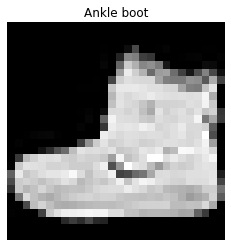

In [ ]:
plt.imshow(image.squeeze(),cmap ='gray')
plt.title(class_names[label]);
plt.axis(False);

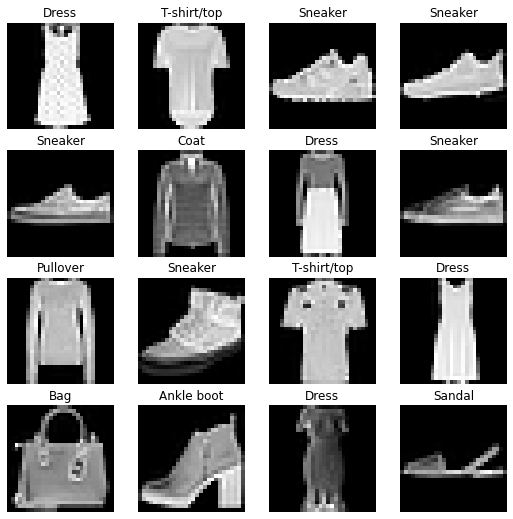

In [ ]:
#plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
row, col =4,4
for i in range(1,row*col+1):
  random_idx =torch.randint(0,len(train_data),size =[1]).item()
  #print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(row,col,i)
  plt.imshow(img.squeeze(),cmap = 'gray')
  plt.title(class_names[label])
  plt.axis(False);

In [ ]:
train_data ,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

Do you think these items of clothing(images) could be modelled with pure linear lines? or do you think we'll need non-linearities?

## 2. Prepare DataLoader 
right now , our data is in the form of pytorch datasets.
Dataloader turn our dataset into a python iterable.

specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?
1. it is more computationally efficent, as in your computing hardware may not be able to look(store in memory) at 60000 images in one hit. so we break it down to 32 images at a time (batch size of 32)

2. It gives our neural network more chances to update its gradients per epoch.

For more on Mini Batches watch Andrew ng : https://youtu.be/l4lSUAcvHFs

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_data,
                              shuffle=True,
                              batch_size = BATCH_SIZE)
test_dataloader = DataLoader(test_data,
                             shuffle=False,
                             batch_size = BATCH_SIZE)
train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fa0b4af2d90>,
 <torch.utils.data.dataloader.DataLoader at 0x7fa0b4af2cd0>)

In [ ]:
# Let's Check out what we've created 
print(f"DataLoaders : {train_dataloader , test_dataloader}")
print(f"length of Train Dataloader: {len(train_dataloader)} Batches of {BATCH_SIZE} ...")
print(f"length of Test Dataloader: {len(test_dataloader)} Batches of {BATCH_SIZE} ...")

DataLoaders : (<torch.utils.data.dataloader.DataLoader object at 0x7fa0b4af2d90>, <torch.utils.data.dataloader.DataLoader object at 0x7fa0b4af2cd0>)
length of Train Dataloader: 1875 Batches of 32 ...
length of Test Dataloader: 313 Batches of 32 ...


In [ ]:
train_features_batch ,train_label_batch = next(iter(train_dataloader))
train_features_batch.shape,train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size : torch.Size([1, 28, 28])
label : 0 , label size : torch.Size([])


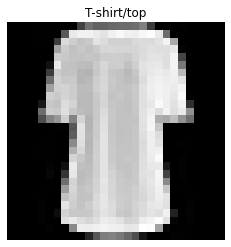

In [ ]:
# Show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img,label = train_features_batch[random_idx],train_label_batch[random_idx]
plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False);
print(f"Image size : {img.shape}")
print(f"label : {label} , label size : {label.shape}")

## 3.model 0: Build a baseline model 

when starting to build a series of machine learning modelling experiment, its best practice to start with baseline model 

A baseline model is simple a model you will try and improve upon with subsequent models/experiments.

In other words: start simple and add complexity when necessary.


In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# get a single sample 
x= train_features_batch[0]

# Flatten the sample
output = flatten_model(x) #perform forward pass

print(f"shape before flattening : {x.shape} -> [ color channels,height,width]")
print(f"Shape after flattening : {output.shape} -> [color channel ,height*width]")

shape before flattening : torch.Size([1, 28, 28]) -> [ color channels,height,width]
Shape after flattening : torch.Size([1, 784]) -> [color channel ,height*width]


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units : int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(hidden_units,output_shape)
    )
  def forward(self,x):
    return self.layer_stack(x)    

In [ ]:
torch.manual_seed(42)

#setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 784, #28*28
    hidden_units = 10, # how many units in the hidden layer
    output_shape= len(class_names) # one for every class 
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1setup loss,optimizer and evaluation metric

* Loss function - since we are working with multiclass data, our loss function will be `nn.CrossEntropyLoss()`
* optimizer - our optimizer `torch.optim.SGD()
* evaluation metric - since we are working on a classification problem, lets ise accuracy as our evaluation metric.

In [ ]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torchmetrics import Accuracy 
accuracy = Accuracy(task="multiclass", num_classes=len(class_names))

#setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr = 0.1)

### 3.2create a function to time our expiriments 
Machine learning is very experimental
Two of the main things you'll often want to track are:
1. Model's performance (loss and Accuracy values etc)
2. How Fast it runs 

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device =None):
  '''prints difference between start and end time.'''
  total_time = end - start
  print(f"Train time on {device}: {total_time : .3f} seconds" )
  return total_time

In [ ]:
start_time = timer()
#some code....
end_time = timer()
print_train_time(start_time,end_time,device= "cpu")

Train time on cpu:  0.000 seconds


4.050700044899713e-05

### 3.3Creating a training loop and training a model on batches of data

1. loop through epochs.
2. loop through training batches, perform training steps, caluculate the train loss *per batch*
3. loop through testing batches, perform testing steps, caluculate the test loss *per batch*
4. print out whats happening.
5. time it all(for fun)

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

#set the seed and start the timer 
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the  number of epochs (we'll keep this small for faster training time)
epochs = 3

# create training and test loop
for epoch in tqdm (range(epochs)):
  print(f"Epoch : {epoch}\n------")
  ### Training
  train_loss = 0 
  # Add a loop to loop through the training batches 
  for batch ,(X,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss #accumulate train loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 400 ==0:
      print(f"looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total Train loss by length of train dataloader
  train_loss /=len(train_dataloader)

  ### testing
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred,y_test)

      test_acc += accuracy(y_test,test_pred.argmax(dim=1))

    test_loss/=len(test_dataloader)

    test_acc /=len(test_dataloader)

  print(f"\n train loss : {train_loss:.4f} | test loss : {test_loss:.4f} | test acc : {test_acc:.4f}  ")

#calucalte training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(train_time_start_on_cpu,
                                            train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

 train loss : 0.5904 | test loss : 0.5095 | test acc : 0.8204  
Epoch : 1
------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

 train loss : 0.4763 | test loss : 0.4799 | test acc : 0.8320  
Epoch : 2
------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

 train loss : 0.4550 | test loss : 0.4766 | test acc : 0.8343  
Train time on cpu:  42.290 seconds


### 4. Make predictions and get model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
  """ Returns a dictionary containing the results of model predicting on data_loader."""
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,
      # Make predictions
      y_pred = model(X)

      #Accumlate the loss and acc values per batch
      loss+= loss_fn(y_pred,y)
      acc +=accuracy (y,y_pred.argmax(dim=1))
      
    #scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return{"model_name" : model.__class__.__name__,
         "model_loss" : loss.item(),
         "model_acc" : acc}

model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': tensor(0.8343)}

In [ ]:
## 5.setup device agnositic code (for using a Gpu)
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 6. building a better model with non linearity

In [ ]:
from torch.nn.modules.activation import ReLU
from torch.nn.modules import linear
#create a model with non linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape : int,
               hidden_units:int,
               output_shape : int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape,hidden_units),
        nn.ReLU(),
        nn.Linear(hidden_units,output_shape),
        nn.ReLU()
    )
  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
# Create an instance of the model
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,# this is the output of flatten layer 28*28
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 create a loss function,optimizer and evaluation metrics

In [ ]:
from torchmetrics import Accuracy 
accuracy = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_1.parameters(),
                            lr = 0.1)

### 6.2 Functionizing training and evaluation/testing loops

lets create a function for :
1. training loop : `train_step()`
2.testing loop : `test_step()`

In [ ]:
def train_step(model:torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer :torch.optim.Optimizer,
               accuracy,
               device : torch.device = device):
  """performs a training with model ttrying to learn on data_loader."""
  # put model into a training mode
  model.train()

  train_loss,train_acc = 0,0 
  # Add a loop to loop through the training batches 
  for batch ,(X,y) in enumerate(data_loader):
    X,y =X.to(device),y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss #accumulate train loss
    train_acc += accuracy(y_pred.argmax(dim=1),y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #if batch % 400 ==0:
      #print(f"looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total Train loss and accuracy by length of train dataloader
  train_loss /=len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss:{train_loss:.5f} | train acc: {train_acc*100:.2f}%")

In [ ]:
def test_step(model:torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy,
               device : torch.device = device):
  test_loss, test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X_test,y_test in data_loader:
      X_test,y_test =X_test.to(device),y_test.to(device)
      test_pred = model(X_test)
      loss = loss_fn(test_pred,y_test)
      test_loss +=loss
      test_acc += accuracy(test_pred.argmax(dim=1),y_test)
      #print(test_acc)
    test_loss/=len(data_loader)
    test_acc /=len(data_loader)
    print(f"test loss : {test_loss:.5f} | test acc : {test_acc*100:.2f}%  ")

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs =3

#create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n---------")
  train_step(model =model_1,
             data_loader =train_dataloader,
             loss_fn =loss_fn,
             optimizer =optimizer,
             accuracy =accuracy,
             device = device
             )
  test_step(model_1,
             test_dataloader,
             loss_fn,
             accuracy,
             device)
  
  train_time_end_on_gpu = timer()
  total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                              end = train_time_end_on_gpu,
                                              device =device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
---------
Train loss:1.09199 | train acc: 61.34%
test loss : 0.95636 | test acc : 65.00%  
Train time on cuda:  25.959 seconds
Epoch : 1
---------
Train loss:0.78101 | train acc: 71.93%
test loss : 0.72227 | test acc : 73.91%  
Train time on cuda:  38.462 seconds
Epoch : 2
---------
Train loss:0.67027 | train acc: 75.94%
test loss : 0.68500 | test acc : 75.02%  
Train time on cuda:  50.823 seconds


> **Note:** some times, depending on your data/hardware you might find that your model trains faster on cpu than gpu
>
> why is this
>
> 1. it could be that the overhead for copying data/model to and from the GPU over weights the compute benifits offered by the GPU.
> 2. the Hardware you're using has a better cpu in terms compute capability than GPU.

> for more on how to make your computer faster look it here: 
> https://horace.io/brrr_intro.html


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': tensor(0.8343)}

In [ ]:
total_train_time_model_0

42.28950581300069

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device = device):
  """ Returns a dictionary containing the results of model predicting on data_loader."""
  loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      X,y =X.to(device),y.to(device)
      # Make predictions
      y_pred = model(X)

      #Accumlate the loss and acc values per batch
      loss+= loss_fn(y_pred,y)
      acc +=accuracy (y_pred.argmax(dim=1),y)
      
    #scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return{"model_name" : model.__class__.__name__,
         "model_loss" : loss.item(),
         "model_acc" : acc*100}

In [ ]:
# Get model_1 results dictionary
model_1_results = eval_model(
                             model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy,
                             device=device
)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': tensor(75.0200, device='cuda:0')}

## Model 2 : Building a Convolutional neural networks 

CNN's are known as Convnets.

CNN's are known for their capabilities to find patterns in visual data.

To know whats happening inside and visuliaze CNN, refer this website:
https://poloclub.github.io/cnn-explainer/

to fread more on CNN:
https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [ ]:
# Create a convolutional Neural Network
class FashionMNISTModelV2(nn.Module):
  """
  Model Architeture that Replicates the TinyVGG
  model from Cnn Explainer website.
  """

  def __init__(self,input_shape:int,
               hidden_units : int,
               output_shape :int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size= 3,
                  stride =1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size= 3,
                  stride =1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride =2)

    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size= 3,
                  stride =1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size= 3,
                  stride =1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(2)
        
    )
    self.classifer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features = output_shape)   
    )

  def forward(self,x):
    x =self.conv_block_1(x)
    #print(f"Output shape of conv1: {x.shape}")
    x= self.conv_block_2(x)
    #print(f"Output shape of conv2: {x.shape}")
    x = self.classifer(x)
    #print(f"Output shape of classifer : {x.shape}")
    return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=30,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1470, out_features=10, bias=True)
  )
)

### 7.1 Stepping Through nn.Conv2d()

See the documentation for nn conv2d :
https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [ ]:
torch.manual_seed(42)

# Create a batch of images 
images = torch.randn(size = (32,3,64,64))
test_images = images[0]

print(f"Image batch Shape: {images.shape}")
print(f"Single image shape : {test_images.shape}")
print(f"test images \n {test_images} ")

Image batch Shape: torch.Size([32, 3, 64, 64])
Single image shape : torch.Size([3, 64, 64])
test images 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[

In [ ]:
torch.manual_seed(42)
# Create a single Conv2d layer 
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

#pass the data through convolution layer
conv_output = conv_layer(test_images)
conv_output.shape

torch.Size([10, 62, 62])

### 7.2 Stepping Through `nn.maxpool2d`
https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [ ]:
test_images.shape

torch.Size([3, 64, 64])

In [ ]:
torch.manual_seed(42)
# Print Out original Image shape without unsqueezed dimension
print(f"Test image with Original Shape: {test_images.shape}")
print(f"Test image with unsqueezed dimension: {test_images.unsqueeze(0).shape}")

#create a sample nn.maxpool2d layer
maxpool_layer = nn.MaxPool2d(kernel_size = 2)

test_image_through_conv = conv_layer(test_images.unsqueeze(dim=0))
print(f"Shape after going through conv_layer():{test_image_through_conv.shape}")

#pass data though max pool layer
test_image_through_conv_and_max_pool = maxpool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and maxpool layer():{test_image_through_conv_and_max_pool.shape}")



Test image with Original Shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer():torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and maxpool layer():torch.Size([1, 10, 31, 31])


In [ ]:
torch.manual_seed(42)

# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2) )
print(f"\nRandom tensor: {random_tensor}")
print(f"Random tensor shape : {random_tensor.shape}")

max_pool_layer = nn.MaxPool2d(kernel_size = 2)

max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor: {max_pool_tensor}")
print(f"Max pool tensor shape : {max_pool_tensor.shape}")



Random tensor: tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape : torch.Size([1, 1, 2, 2])

Max pool tensor: tensor([[[[0.3367]]]])
Max pool tensor shape : torch.Size([1, 1, 1, 1])


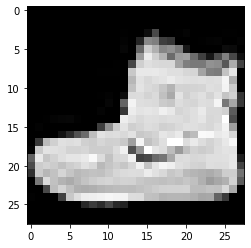

In [ ]:
plt.imshow(image.squeeze(),cmap = "gray")

In [ ]:
input_tensor = torch.randn(1,28,28)

output = model_2(input_tensor.unsqueeze(0).to(device))

#print(f"input tensor: {input_tensor} ")
print(f"input tensor shape : {input_tensor.shape}")

print(f"output tensor: {output} ")
print(f"output tensor shape : {output.shape}")

input tensor shape : torch.Size([1, 28, 28])
output tensor: tensor([[ 0.0361,  0.0298, -0.0393, -0.0253,  0.0455, -0.0426, -0.0075, -0.0253,
          0.0179, -0.0178]], device='cuda:0', grad_fn=<AddmmBackward0>) 
output tensor shape : torch.Size([1, 10])


### 7.3 Setup  a loss function and optimizer for model_2

In [ ]:
from  torchmetrics import Accuracy as accuracy
accuracy = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_2.parameters(),lr= 0.01)

### 7.4 Training and testing model_2 using our training and test functionmm

In [ ]:
torch.manual_seed(42)


#Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

#Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model = model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy = accuracy,
             device = device)
  test_step(model_2,
             test_dataloader,
             loss_fn,
             accuracy,
             device = device)

  train_time_end_model_2 = timer()
  total_train_time_model_2 = print_train_time(train_time_start_model_2,
                                            train_time_end_model_2,
                                            device = device)
  


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss:0.64302 | train acc: 76.43%
test loss : 2.30200 | test acc : 10.74%  
Train time on cuda:  11.823 seconds
Epoch: 1
---------
Train loss:0.64302 | train acc: 76.43%
test loss : 2.30200 | test acc : 10.74%  
Train time on cuda:  24.966 seconds
Epoch: 2
---------
Train loss:0.64302 | train acc: 76.43%
test loss : 2.30200 | test acc : 10.74%  
Train time on cuda:  37.440 seconds


In [ ]:
# Get model_2 results
model_2_results = eval_model(
    model_2,
    test_dataloader,
    loss_fn,
    accuracy,device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 2.3019986152648926,
 'model_acc': tensor(10.7428, device='cuda:0')}

## 8 compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,tensor(0.8343)
1,FashionMNISTModelV1,0.685001,"tensor(75.0200, device='cuda:0')"
2,FashionMNISTModelV2,2.301999,"tensor(10.7428, device='cuda:0')"


In [ ]:
# Add Training time to results comparison
compare_results["training_time"]  = [ total_train_time_model_0,
                                     total_train_time_model_1,
                                     total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,tensor(0.8343),42.289506
1,FashionMNISTModelV1,0.685001,"tensor(75.0200, device='cuda:0')",50.822791
2,FashionMNISTModelV2,2.301999,"tensor(10.7428, device='cuda:0')",37.440182


In [ ]:
!nvidia-smi

Sat Feb 25 23:20:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    26W /  70W |   1097MiB / 15360MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 9. make an evaluate random prediction with best model

In [ ]:
def make_predicitions(model:torch.nn.Module,
                      data:list,
                      device:torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample,dim=0).to(device)

      pred_logits = model(sample)

      pred_prob = torch.softmax(pred_logits.squeeze(),dim = 0)

      pred_probs.append(pred_prob.cpu())

#stack the pred probs to turn list into tensor
  return torch.stack(pred_probs)


In [ ]:
import random
random.seed(42)
test_sample = []
test_labels = []
for sample,label in random.sample(list(test_data),k=9):
  test_sample.append(sample)
  test_labels.append(label)

test_sample[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

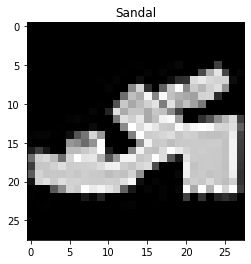

In [ ]:
plt.imshow(test_sample[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
#Make predictions
pred_probs = make_predicitions(model=model_2,
                               data = test_sample)
pred_probs[:2]

tensor([[0.1010, 0.1029, 0.0980, 0.0991, 0.1029, 0.0967, 0.1004, 0.0982, 0.1027,
         0.0979],
        [0.1013, 0.1027, 0.0981, 0.0993, 0.1029, 0.0970, 0.1001, 0.0982, 0.1029,
         0.0974]])

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([4, 4, 8, 4, 4, 4, 8, 4, 4])

In [ ]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

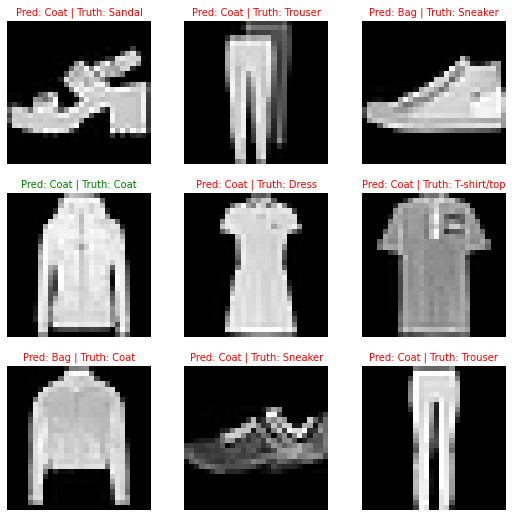

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_sample):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## 10. Making a confusion matrix for further prediction evaluation

A Confusion matrix is a fantastic way of evaluating your classification models visually: https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

To make a confusion matrix, we'll go through three steps:

1. Make predictions with our trained model, model_2 (a confusion matrix compares predictions to true labels).
2. Make a confusion matrix using `torchmetrics.ConfusionMatrix`.
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`
.

Extra reading:
https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html?highlight=confusion%20matrix

http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/


In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.14.0
mlxtend version: 0.14.0


In [ ]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 14 # should be version 0.19.0 or higher

0.14.0


In [ ]:
mlxtend.__version__

'0.14.0'

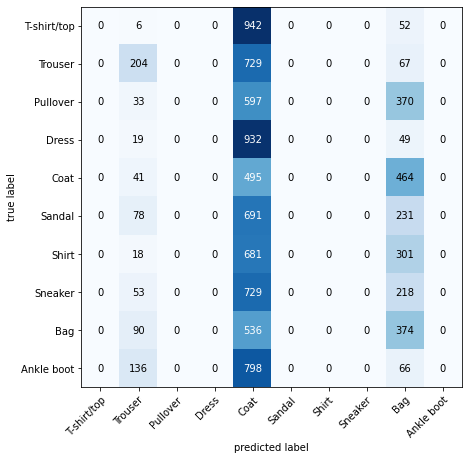

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);